In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
iso639_3 = {
    'engelsk': 'eng',
    'polsk': 'pol',
    'russisk': 'rus',
    'somali': 'som',
    'spansk': 'spa',
    'tysk': 'deu',
    'vietnamesisk': 'vie'
}

In [4]:
df = pd.read_csv('metadata.csv')

In [5]:
def heatmap(values, xticks, yticks, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.imshow(values, cmap='viridis')
    ax.set_yticks(range(len(yticks)))
    ax.set_xticks(range(len(xticks)))
    ax.set_yticklabels(yticks)
    ax.set_xticklabels(xticks)

    col_cutoff = values.max().max() / 2

    for i, row in enumerate(values.itertuples()):
        for j, count in enumerate(row[1:]):
            col = 'white' if count < col_cutoff else 'black'
            ax.text(j, i, int(count),
                    horizontalalignment='center',
                    verticalalignment='center', color=col)

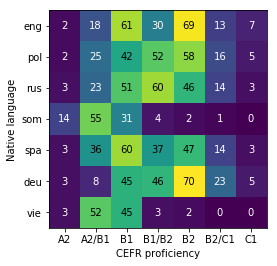

In [6]:
counts = df.groupby(['lang', 'cefr']).size().unstack(fill_value=0)

heatmap(counts, counts.columns, [iso639_3[l] for l in counts.index])

plt.ylabel('Native language')
plt.xlabel('CEFR proficiency')

plt.show()

In [7]:
counts = df.groupby(['testlevel', 'lang']).size().unstack(fill_value=0)
counts.columns = [iso639_3[l] for l in counts.columns]
counts.columns.name = 'L1'
counts.index.name = 'Test level'
counts

L1,eng,pol,rus,som,spa,deu,vie
Test level,,,,,,,
Høyere nivå,100,100,100,7,100,100,5
Språkprøven,100,100,100,100,100,100,100


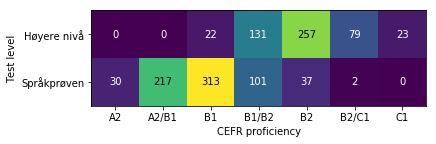

In [8]:
counts = df.groupby(['testlevel', 'cefr']).size().unstack(fill_value=0)

heatmap(counts, counts.columns, counts.index)

plt.ylabel('Test level')
plt.xlabel('CEFR proficiency');

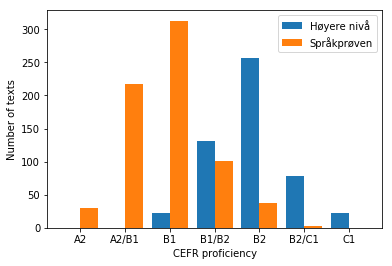

In [9]:
width = 0.4
xs = np.arange(len(counts.columns))
plt.bar(xs, counts.iloc[0], width=width, label=counts.index[0])
plt.bar(xs + width, counts.iloc[1], width=width, label=counts.index[1])
plt.xticks(xs + (width / 2), counts.columns)
plt.ylabel("Number of texts")
plt.xlabel("CEFR proficiency")
plt.legend();

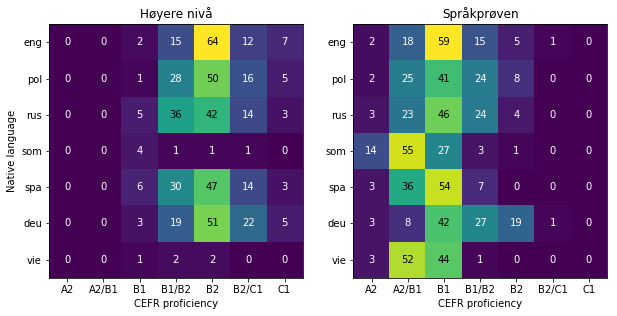

In [10]:
groups = df.groupby('testlevel')
fig, axes = plt.subplots(1, 2)
fig.set_size_inches(10,6)

columns = ['A2', 'A2/B1', 'B1', 'B1/B2', 'B2', 'B2/C1', 'C1']

for ax, (testlevel, group) in zip(axes, groups):
    counts = group.groupby(['lang', 'cefr']).size().unstack(fill_value=0)
    for col in columns:
        if col not in counts.columns:
            counts[col] = 0
    counts = counts[columns]

    heatmap(counts, columns, [iso639_3[l] for l in counts.index], ax=ax)
    ax.set_title(testlevel)

axes[0].set_ylabel('Native language')
axes[0].set_xlabel('CEFR proficiency')
axes[1].set_xlabel('CEFR proficiency')

# plt.savefig('testlevel_lang_vs_cefr.pdf')
plt.show()

In [11]:
topic_and_level = df.groupby(['topic', 'testlevel']).size().unstack(fill_value=0)
topic_and_level['total'] = topic_and_level.sum(axis=1)
topic_and_level.sort_values('total', ascending=False)

testlevel,Høyere nivå,Språkprøven,total
topic,,,
telefon,37,64,101
bolig,0,83,83
familie helse vekt,59,0,59
tid,2,51,53
natur norge,0,48,48
folk relasjoner vennskap,0,45,45
tradisjoner flytting,0,38,38
barn,3,32,35
kultur norge,0,34,34


In [12]:
topics = set()
for topic in df.topic:
    topics.update(topic.split())
print(sorted(topics))
print(len(topics))

['arbeid', 'barn', 'befolkning', 'bil', 'biografi', 'bok', 'bolig', 'dikt', 'død', 'eldre', 'familie', 'film', 'flytting', 'folk', 'følelser', 'geografi', 'handel', 'helse', 'holdning', 'humor', 'idrett', 'idrett/sport', 'innvandring', 'interesse', 'kjønn', 'klima', 'konkurranse', 'kultur', 'litteratur', 'media', 'miljø', 'musikk', 'møte', 'natur', 'norge', 'opplevelse', 'organ', 'organisasjon', 'personer', 'politikk', 'reise', 'relasjoner', 'religion', 'rus', 'røyking', 'samfunn', 'skole', 'språk', 'styreform', 'telefon', 'tid', 'tradisjoner', 'trafikk', 'tv', 'utdannelse', 'valg', 'vekt', 'venner', 'vennskap', 'verdier', 'yrke', 'økonomi']
62


In [13]:
from collections import Counter

In [14]:
topic_freqs = Counter()
for topic in df.topic:
    topic_freqs.update(topic.split())
print(topic_freqs)

Counter({'bolig': 140, 'familie': 120, 'litteratur': 117, 'telefon': 101, 'norge': 101, 'folk': 95, 'helse': 88, 'kultur': 79, 'arbeid': 71, 'barn': 67, 'trafikk': 63, 'vekt': 59, 'tid': 53, 'dikt': 52, 'økonomi': 50, 'yrke': 49, 'natur': 48, 'utdannelse': 46, 'vennskap': 45, 'relasjoner': 45, 'bok': 44, 'media': 40, 'flytting': 40, 'tradisjoner': 38, 'innvandring': 34, 'kjønn': 31, 'bil': 30, 'verdier': 30, 'biografi': 28, 'språk': 26, 'geografi': 25, 'idrett/sport': 25, 'politikk': 24, 'tv': 21, 'holdning': 20, 'miljø': 18, 'venner': 18, 'klima': 16, 'valg': 15, 'møte': 14, 'religion': 13, 'reise': 12, 'død': 12, 'befolkning': 9, 'opplevelse': 9, 'organisasjon': 8, 'handel': 8, 'rus': 7, 'eldre': 6, 'konkurranse': 5, 'musikk': 5, 'samfunn': 5, 'følelser': 5, 'organ': 5, 'humor': 4, 'idrett': 3, 'skole': 3, 'interesse': 3, 'styreform': 3, 'røyking': 3, 'personer': 2, 'film': 2})


In [15]:
pd.DataFrame(topic_freqs.most_common(), columns=['topic', 'count'])

,topic,count
0,bolig,140
1,familie,120
2,litteratur,117
3,telefon,101
4,norge,101
5,folk,95
6,helse,88
7,kultur,79
8,arbeid,71
9,barn,67
